### Классификация
#### 1. Импортируем библиотеки и датасет (геометрические свойства трех видов пшеницы).

In [128]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, plotly.express as px
from sklearn import tree,ensemble,model_selection,metrics,neighbors
from warnings import filterwarnings as fw
fw('ignore')

In [129]:
data = pd.read_csv('seeds.csv')
data.head()

,area,perimeter,compactness,kernellength,kernelwidth,assymetry,groovelength,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Отберем в отдельные датафреймы характеристики объектов и метки классов. 
<br>Затем поделим датасет на обучающую и тестовую выборки в классическом соотношении 1:4.

In [130]:
x = data.iloc[:,:7]
y = data.iloc[:,7:]
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.2)
print('xtrain: ', xtrain.shape, 'ytrain: ', ytrain.shape, '\nxtest: ', xtest.shape, 'ytest: ', ytest.shape)
ytest=ytest.to_numpy().flatten()

xtrain:  (168, 7) ytrain:  (168, 1) 
xtest:  (42, 7) ytest:  (42, 1)


#### 2. Построим дерево решений со значениями по умолчанию.

Оценим результат с помощью таких метрик, как precision, recall, f1-score, а также AUC и матриц ошибок.

In [131]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    1.00000   0.82353   0.90323        17
           2    0.92308   1.00000   0.96000        12
           3    0.86667   1.00000   0.92857        13

    accuracy                        0.92857        42
   macro avg    0.92991   0.94118   0.93060        42
weighted avg    0.93675   0.92857   0.92729        42

AUC (area under ROC curve) =  0.9535384268649988


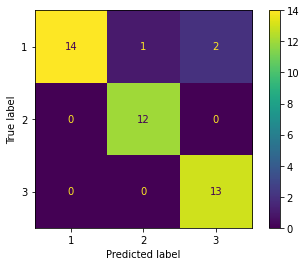

In [132]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [133]:
for i in range(7):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

area  -  0.36641788891005334
perimeter  -  0.023231571109456436
kernellength  -  0.01489203276247208
kernelwidth  -  0.007708717583115145
assymetry  -  0.04043466820439039
groovelength  -  0.5473151214305126


Дерево решений:

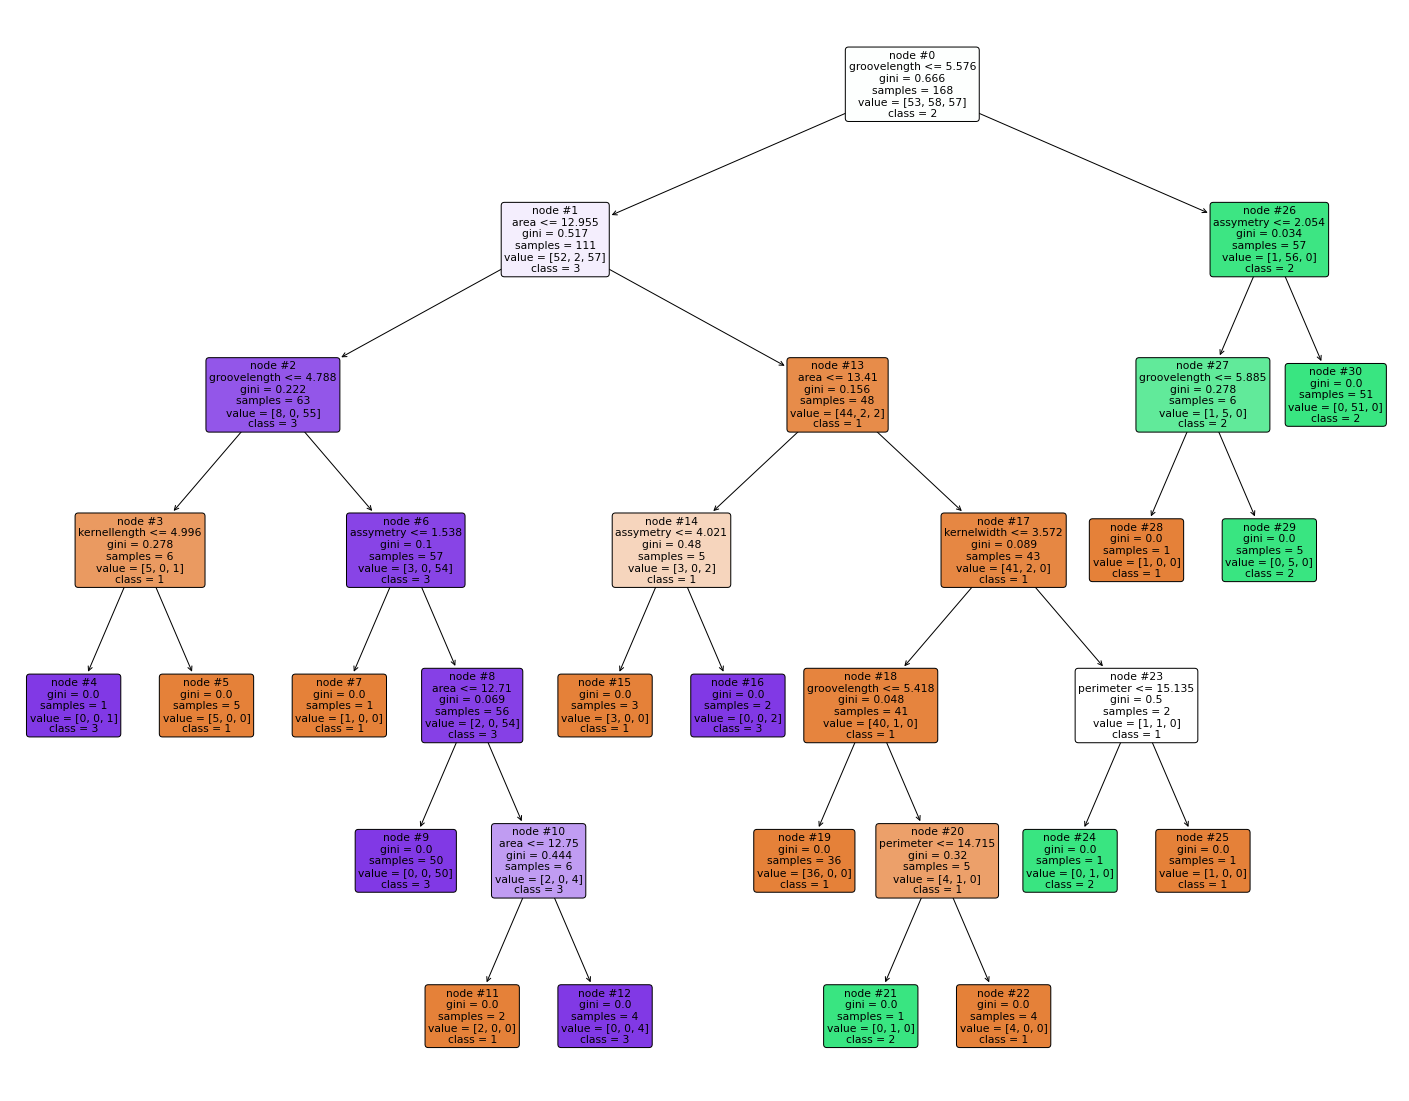

In [134]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, 
                   feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                   class_names=['1','2','3'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

##### Построим дерево решений с максимальной числом уровней в 2.

In [135]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.83333   0.88235   0.85714        17
           2    1.00000   1.00000   1.00000        12
           3    0.83333   0.76923   0.80000        13

    accuracy                        0.88095        42
   macro avg    0.88889   0.88386   0.88571        42
weighted avg    0.88095   0.88095   0.88027        42

AUC (area under ROC curve) =  0.9357632495969209


Матрица ошибок:

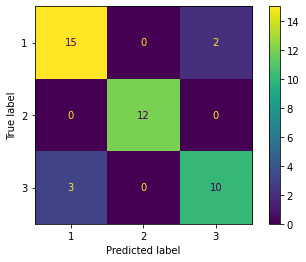

In [136]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [137]:
for i in range(7):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

area  -  0.4039690698609932
assymetry  -  0.003359312329005595
groovelength  -  0.5926716178100011


Дерево решений:

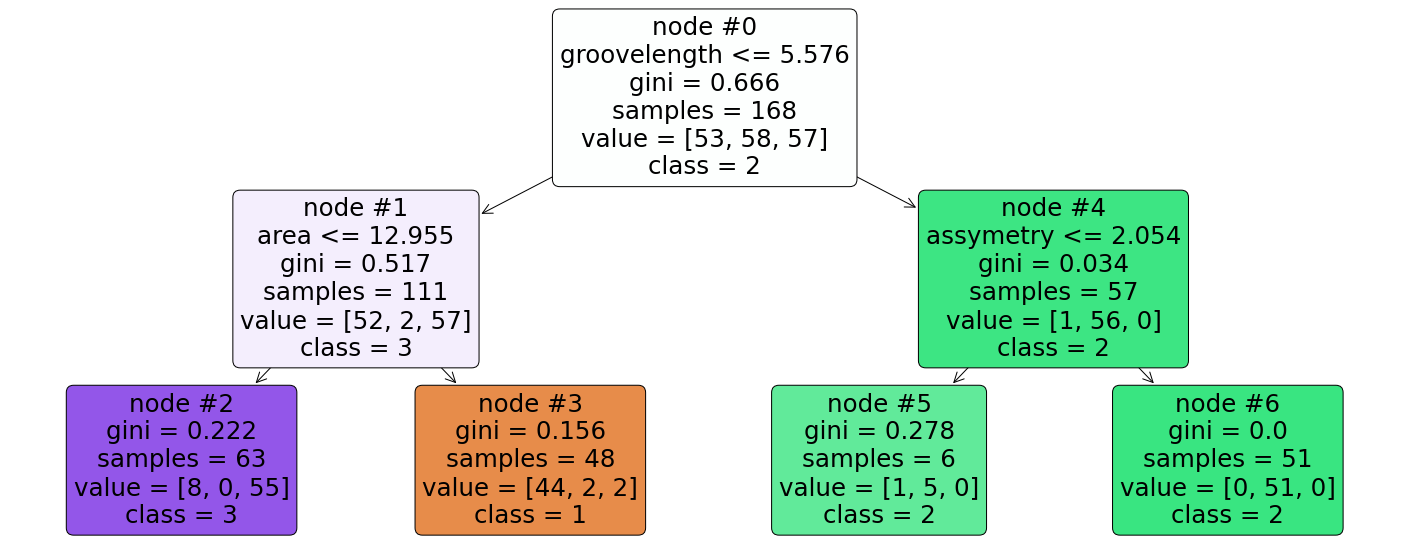

In [138]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(DTC, 
                   feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                   class_names=['1','2','3'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

##### Построим дерево решений с минимальным числом объектов узла в 6.

In [139]:
DTC = tree.DecisionTreeClassifier(min_samples_leaf=10)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.72727   0.94118   0.82051        17
           2    1.00000   1.00000   1.00000        12
           3    0.87500   0.53846   0.66667        13

    accuracy                        0.83333        42
   macro avg    0.86742   0.82655   0.82906        42
weighted avg    0.85092   0.83333   0.82418        42

AUC (area under ROC curve) =  0.9636427939876215


Матрица ошибок:

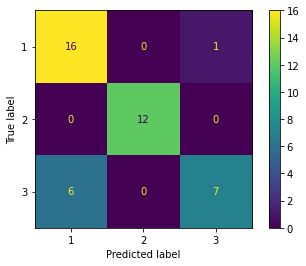

In [140]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [141]:
for i in range(7):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

area  -  0.3750923412767583
kernelwidth  -  0.0017247231727567116
assymetry  -  0.010458427749694962
groovelength  -  0.61272450780079


Дерево решений:

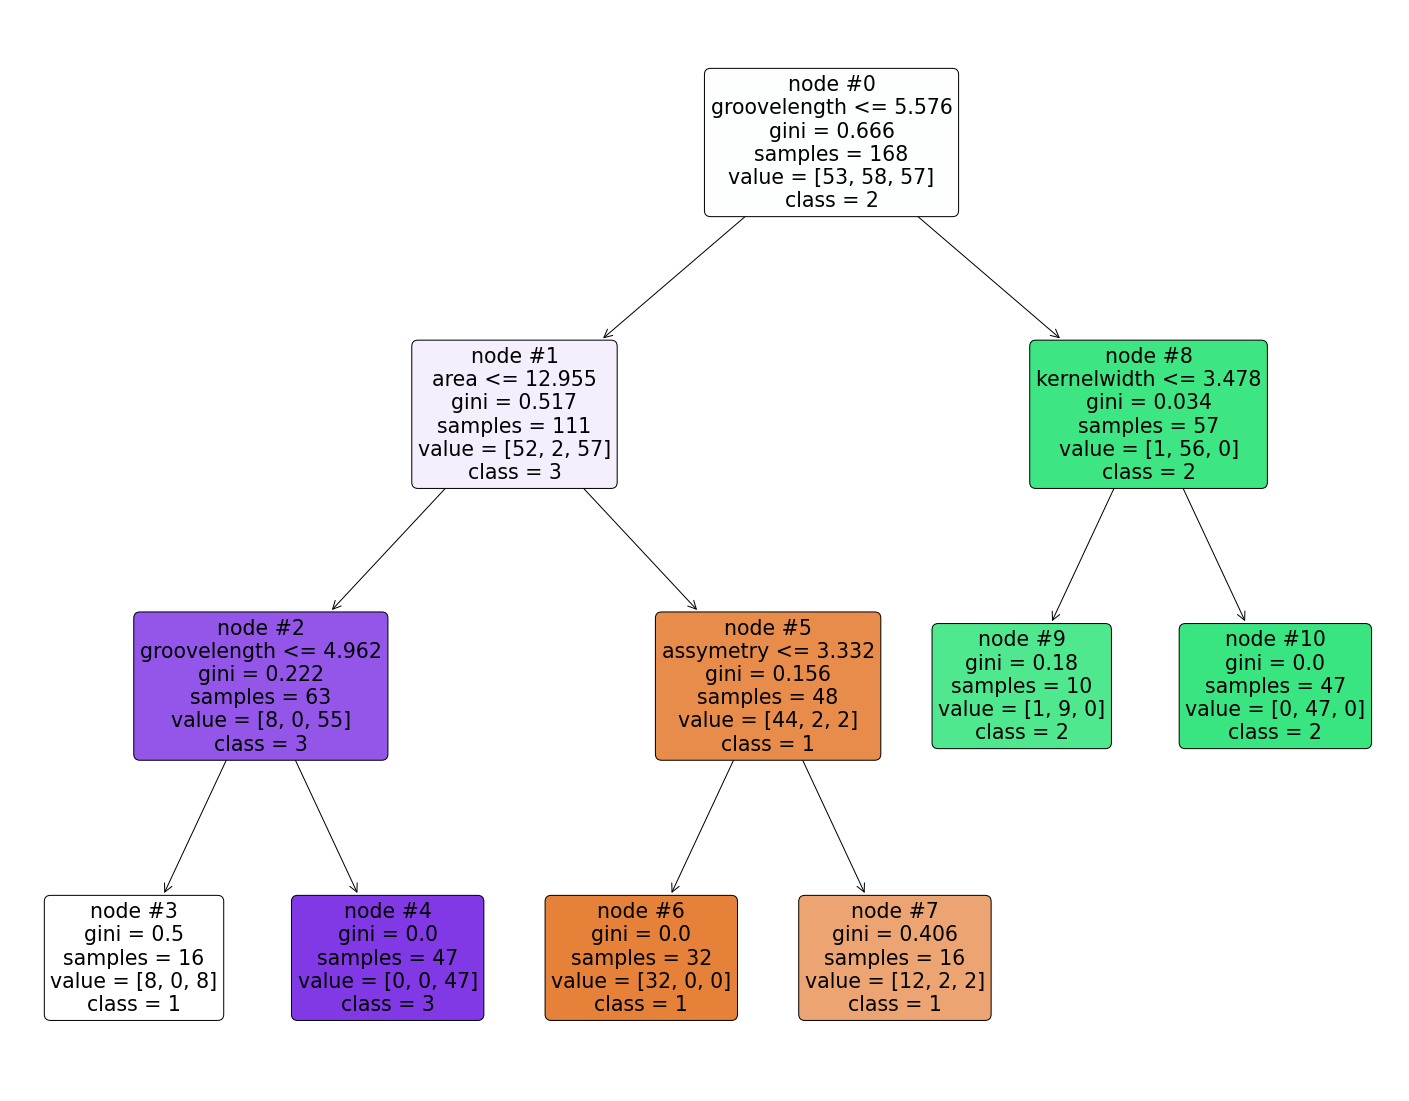

In [142]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, 
                   feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                   class_names=['1','2','3'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

#### 3. Модель RandomForest.

##### Построим модель на значениях по умолчанию: 100 деревьев, все параметры, полные деревья.

In [144]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    1.00000   0.88235   0.93750        17
           2    1.00000   1.00000   1.00000        12
           3    0.86667   1.00000   0.92857        13

    accuracy                        0.95238        42
   macro avg    0.95556   0.96078   0.95536        42
weighted avg    0.95873   0.95238   0.95259        42

AUC (area under ROC curve) =  0.9946023820668851


##### Построим модель, сократив количество деревьев вдвое: 50 деревьев, все параметры, полные деревья.

In [145]:
RFC = ensemble.RandomForestClassifier(n_estimators=50)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.93750   0.88235   0.90909        17
           2    1.00000   1.00000   1.00000        12
           3    0.85714   0.92308   0.88889        13

    accuracy                        0.92857        42
   macro avg    0.93155   0.93514   0.93266        42
weighted avg    0.93048   0.92857   0.92881        42

AUC (area under ROC curve) =  0.99131533780621


##### Построим модель, сократив максимальное количество параметров практически вдвое: 100 деревьев, 4 параметра, полные деревья.

In [146]:
RFC = ensemble.RandomForestClassifier(max_features=4)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    1.00000   0.88235   0.93750        17
           2    1.00000   1.00000   1.00000        12
           3    0.86667   1.00000   0.92857        13

    accuracy                        0.95238        42
   macro avg    0.95556   0.96078   0.95536        42
weighted avg    0.95873   0.95238   0.95259        42

AUC (area under ROC curve) =  0.992391948821969


##### Построим модель, сократив число уровней деревьев: 100 деревьев, все параметры, деревья с числом уровней не более 2.

In [147]:
RFC = ensemble.RandomForestClassifier(max_depth=2)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.88235   0.88235   0.88235        17
           2    1.00000   1.00000   1.00000        12
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.90476        42
   macro avg    0.90950   0.90950   0.90950        42
weighted avg    0.90476   0.90476   0.90476        42

AUC (area under ROC curve) =  0.9868518229572997


##### Для модели с наибольшей оценкой (со значениями по умолчанию) построим три дерева, входящих в нее.

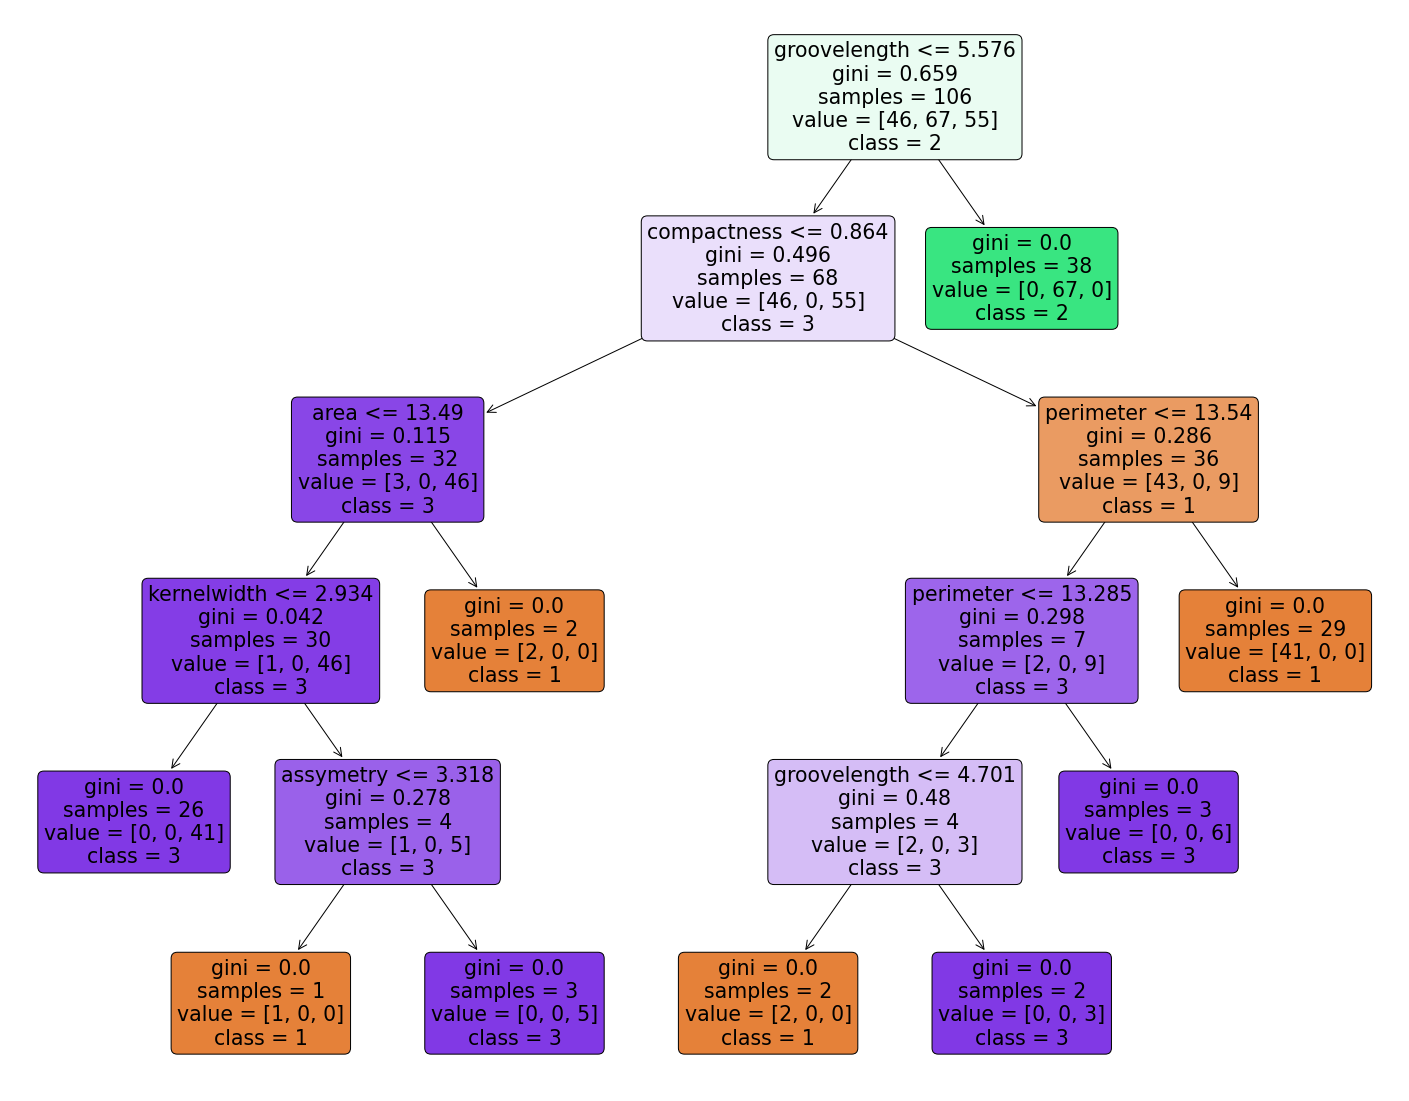

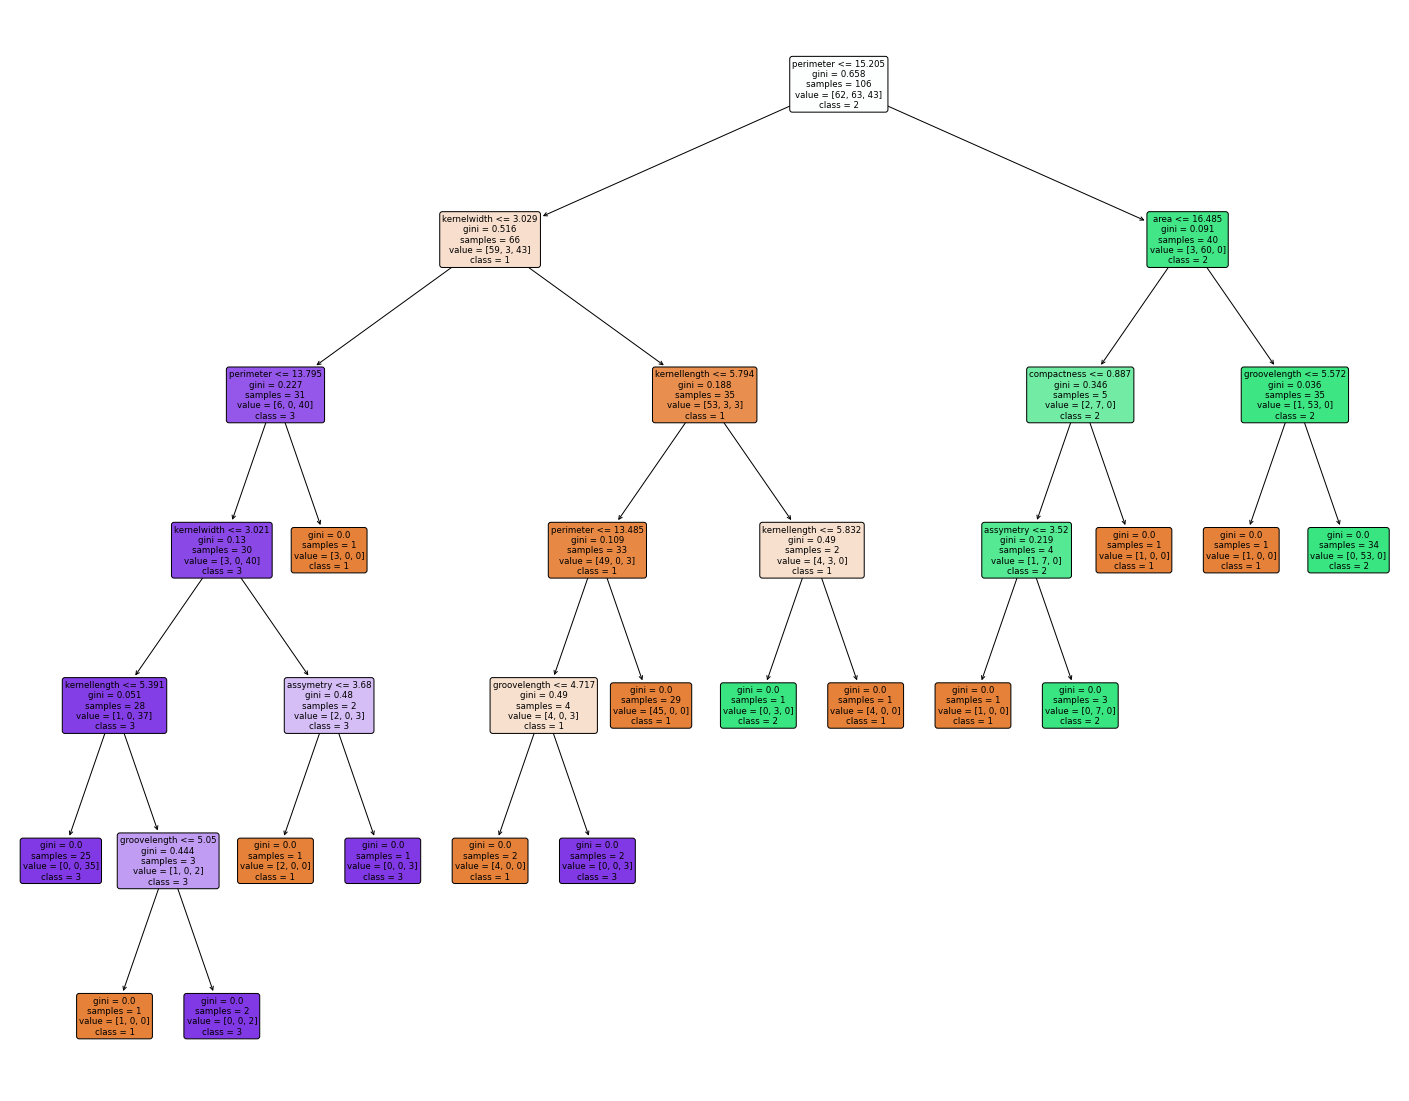

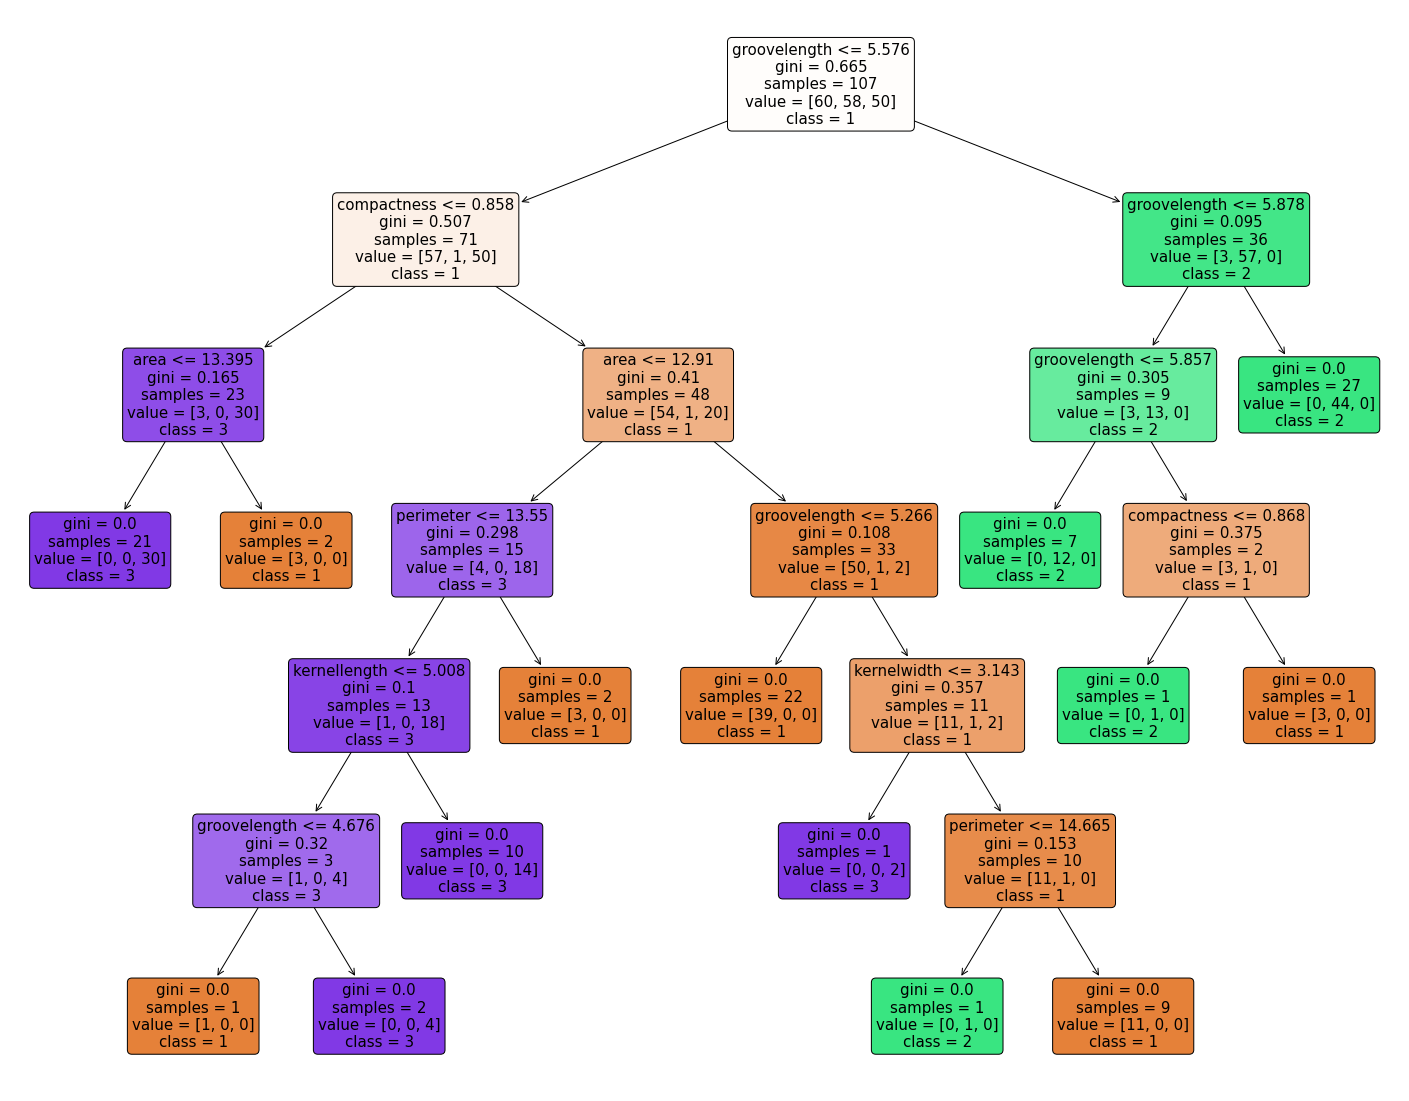

In [167]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(xtrain,ytrain.to_numpy().flatten())

for i in range(3):
    fig = plt.figure(figsize=(25,20))
    a = tree.plot_tree(RFC.estimators_[i*49], 
                    feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                    class_names=['1','2','3'],
                    filled=True,
                    rounded=True)

#### 4. Оценим важность показателей с помощью RandomForest.

In [168]:
for i in range(7):
    print(data.columns[i], ' - ', RFC.feature_importances_[i])

area  -  0.1746369628849886
perimeter  -  0.21255195875142371
compactness  -  0.048158297073095366
kernellength  -  0.11941786922665237
kernelwidth  -  0.15943260849014768
assymetry  -  0.06646081010736024
groovelength  -  0.21934149346633192


Таким образом, наши показатели в порядке убывания важности:
<br> groovelength > perimeter > area > kernelwidth > kernellength > assymetry > compactness
<br> Построим диаграммы размаха для трех наиболее важных показателей.

In [151]:
px.box(data[['groovelength','class']], x='class', y='groovelength', title='groovelength distribution by classes')

In [169]:
px.box(data[['perimeter','class']], x='class', y='perimeter', title='perimeter distribution by classes')

In [170]:
px.box(data[['area','class']], x='class', y='area', title='area distribution by classes')

#### 5. Построение моделей Decision tree на полном наборе показателей, на 20% самых важных, на 80% наименее важных.

In [172]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    1.00000   0.94118   0.96970        17
           2    1.00000   1.00000   1.00000        12
           3    0.92857   1.00000   0.96296        13

    accuracy                        0.97619        42
   macro avg    0.97619   0.98039   0.97755        42
weighted avg    0.97789   0.97619   0.97627        42

AUC (area under ROC curve) =  0.984448951994591


In [173]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain[['groovelength','perimeter']],ytrain)
ypred = DTC.predict(xtest[['groovelength','perimeter']])
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest[['groovelength','perimeter']]),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    1.00000   0.88235   0.93750        17
           2    1.00000   1.00000   1.00000        12
           3    0.86667   1.00000   0.92857        13

    accuracy                        0.95238        42
   macro avg    0.95556   0.96078   0.95536        42
weighted avg    0.95873   0.95238   0.95259        42

AUC (area under ROC curve) =  0.9688979039891819


In [174]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain[['area','compactness','kernellength','kernelwidth','assymetry']],ytrain)
ypred = DTC.predict(xtest[['area','compactness','kernellength','kernelwidth','assymetry']])
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest[['area','compactness','kernellength','kernelwidth','assymetry']]),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.93750   0.88235   0.90909        17
           2    0.91667   0.91667   0.91667        12
           3    0.92857   1.00000   0.96296        13

    accuracy                        0.92857        42
   macro avg    0.92758   0.93301   0.92957        42
weighted avg    0.92878   0.92857   0.92793        42

AUC (area under ROC curve) =  0.9485339193148524


#### 6. Коллективные древовидные модели на базе бустинга: AdaBoost и GradientBoost
Используем AdaBoost со значениями по умолчанию:
<br> Оценим результат с помощью таких метрик, как precision, recall, f1-score, а также AUC и матриц ошибок.

In [156]:
ABC = ensemble.AdaBoostClassifier()
ABC.fit(xtrain,ytrain)
ABCpred = ABC.predict(xtest)
print(metrics.classification_report(ytest,ABCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,ABC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    1.00000   0.05882   0.11111        17
           2    1.00000   1.00000   1.00000        12
           3    0.44828   1.00000   0.61905        13

    accuracy                        0.61905        42
   macro avg    0.81609   0.68627   0.57672        42
weighted avg    0.82923   0.61905   0.52230        42

AUC (area under ROC curve) =  0.8264773495605139


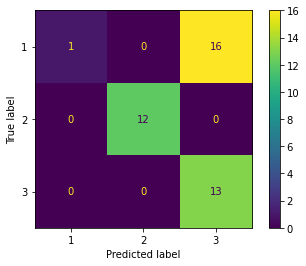

In [157]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ABCpred), display_labels=DTC.classes_).plot()

Теперь используем дерево решений, построенное в пункте 2 в качестве базового классификатора, чтобы получить лучший результат.

In [175]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
DTCpred = ABC.predict(xtest)
print('Before boosting: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))
ABC = ensemble.AdaBoostClassifier(base_estimator=DTC)
ABC.fit(xtrain,ytrain)
ABCpred = ABC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,ABCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,ABC.predict_proba(xtest),average='macro',multi_class='ovr'))

Before boosting: 
              precision    recall  f1-score   support

           1    1.00000   0.88235   0.93750        17
           2    1.00000   1.00000   1.00000        12
           3    0.86667   1.00000   0.92857        13

    accuracy                        0.95238        42
   macro avg    0.95556   0.96078   0.95536        42
weighted avg    0.95873   0.95238   0.95259        42

AUC (area under ROC curve) =  0.9357632495969209
After boosting: 
              precision    recall  f1-score   support

           1    1.00000   0.94118   0.96970        17
           2    1.00000   1.00000   1.00000        12
           3    0.92857   1.00000   0.96296        13

    accuracy                        0.97619        42
   macro avg    0.97619   0.98039   0.97755        42
weighted avg    0.97789   0.97619   0.97627        42

AUC (area under ROC curve) =  1.0


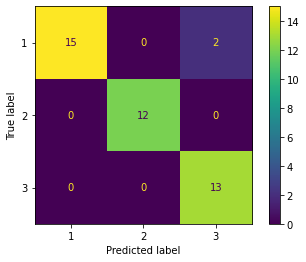

In [159]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ABCpred), display_labels=DTC.classes_).plot()

Используем GradientBoost со значениями по умолчанию:

In [160]:
GBC = ensemble.GradientBoostingClassifier()
GBC.fit(xtrain,ytrain)
GBCpred = GBC.predict(xtest)
print(metrics.classification_report(ytest,GBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,GBC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.93750   0.88235   0.90909        17
           2    1.00000   1.00000   1.00000        12
           3    0.85714   0.92308   0.88889        13

    accuracy                        0.92857        42
   macro avg    0.93155   0.93514   0.93266        42
weighted avg    0.93048   0.92857   0.92881        42

AUC (area under ROC curve) =  0.9933260519061736


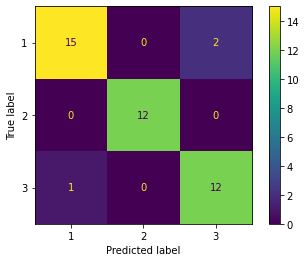

In [161]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,GBCpred), display_labels=DTC.classes_).plot()

In [176]:
print('Before boosting: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))
GBC = ensemble.GradientBoostingClassifier(init=DTC)
GBC.fit(xtrain,ytrain)
GBCpred = GBC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,GBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,GBC.predict_proba(xtest),average='macro',multi_class='ovr'))

Before boosting: 
              precision    recall  f1-score   support

           1    1.00000   0.88235   0.93750        17
           2    1.00000   1.00000   1.00000        12
           3    0.86667   1.00000   0.92857        13

    accuracy                        0.95238        42
   macro avg    0.95556   0.96078   0.95536        42
weighted avg    0.95873   0.95238   0.95259        42

AUC (area under ROC curve) =  0.9357632495969209
After boosting: 
              precision    recall  f1-score   support

           1    1.00000   0.82353   0.90323        17
           2    1.00000   1.00000   1.00000        12
           3    0.81250   1.00000   0.89655        13

    accuracy                        0.92857        42
   macro avg    0.93750   0.94118   0.93326        42
weighted avg    0.94196   0.92857   0.92881        42

AUC (area under ROC curve) =  0.9784095282675405


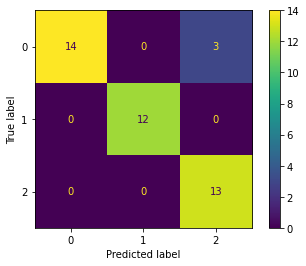

In [177]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,GBCpred), display_labels=DTC.classes_).plot()